## Data analysis

In [1]:
#from utils import *
from lin_GAN_penny_script import *
import torch
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

2023-01-11 15:04:32.293732: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-11 15:04:32.293775: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-11 15:04:34.343767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-11 15:04:34.343803: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-11 15:04:34.343815: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vt-bozzololu): /proc/driver/nvidia/version does not exist
2023-01-11 15:04:34.344018: I tensorflow/core/platform/cpu_featu

In [2]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [3]:
noise_dim = 5
image_size = 8
batch_size = 1

# %%
#load dataset and create a batch
digits, targets = datasets.load_digits(return_X_y=True)
# digits /= 16
# dataloader = DataLoader(list(zip(digits.astype("float32"), targets.astype("float32"))), 
#                         batch_size= batch_size, shuffle= True, drop_last= True)

rd, inp = resize_data(digits, targets, label = (1,), image_size = image_size)
dataloader = torch.utils.data.DataLoader(rd, batch_size=batch_size, shuffle=True, drop_last=True)

In [4]:
# fig = plt.figure(figsize=(10, 5))
# outer = gridspec.GridSpec(len(gan.results), 2, wspace=0.1)

# for i, images in enumerate(gan.results):
#     inner = gridspec.GridSpecFromSubplotSpec(1, images.size(0), subplot_spec=outer[i])
    
#     images = torch.squeeze(images, dim=1)
#     for j, im in enumerate(images):

#         ax = plt.Subplot(fig, inner[j])
#         ax.imshow(im.numpy(), cmap="gray")
#         ax.set_xticks([])
#         ax.set_yticks([])
#         if j==0:
#             ax.set_title(f'Epoch {i}', loc='left')
#         fig.add_subplot(ax)

# plt.show()

In [5]:
def show_images(data, n_samples):

    plt.figure(figsize=(8,2))

    for i in range(n_samples):
        image = data[i][0].reshape(8, 8)
        plt.subplot(1,n_samples,i+1)
        plt.axis('off')
        plt.imshow(image.numpy(), cmap='gray')
        
    plt.show()

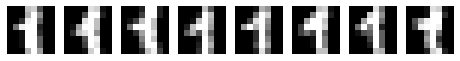

182

In [22]:
# Showing real data

digits = datasets.load_digits()

x_train = digits.data
y_train = digits.target

x_train = x_train.reshape(len(x_train), 8, 8)
x_train.shape

rd, real_data = resize_data(x_train, y_train, label = (1,), image_size = 8)
show_images(rd, 8)
len(rd)

In [23]:
# dataloader = torch.utils.data.DataLoader(rd, batch_size=1, shuffle=True, drop_last=True)

# for elem in dataloader:
#     plt.imshow(elem[0][0])

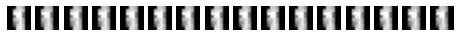

(None, torch.Size([1, 8, 8]))

In [40]:
# Making inference with classical GAN

#model = torch.load('torch_results/GAN/GAN_linear/20230110-153648/lin_gen_epoch_2')   # '0' features
model = torch.load('torch_results/GAN/GAN_linear/20230111-152907/lin_gen_epoch_2')   # '1' features
#model = torch.load('torch_results/GAN/GAN_linear/20230111-141919/lin_gen_epoch_999')   # '0','1' features

#model.eval()

GAN_imgs = []

noise_dim = 5

for i in range(len(real_data)):      
     
    image = model(torch.rand(1, noise_dim)).view(1,8,8).cpu().detach()
    GAN_imgs.append(image)

show_images(GAN_imgs, 16), GAN_imgs[0].shape


# noise_dim = 5

# plt.figure()
# f, axarr = plt.subplots(8, 8) 
# for i, ax in enumerate(axarr.ravel()):
#     ax.imshow(model(torch.rand(1,noise_dim)).detach().numpy().reshape(8,8), cmap = 'gray')
#     ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
# f.tight_layout()
# plt.show()
# plt.figure()
# f, axarr = plt.subplots(8, 8) 
# for i, ax in enumerate(axarr.ravel()):
#     ax.imshow(model(torch.rand(1,noise_dim)).detach().numpy().reshape(8,8), cmap = 'gray')
#     ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
# f.tight_layout()
# plt.show()

In [41]:
model, model(torch.rand(1,noise_dim)).shape

(Generator(
   (dense_layer): Linear(in_features=5, out_features=32, bias=True)
   (relu): LeakyReLU(negative_slope=0.01)
   (lin): Linear(in_features=32, out_features=64, bias=True)
   (activation): Sigmoid()
 ),
 torch.Size([1, 64]))

In [42]:
len(GAN_imgs)

182

In [43]:
#synthetic = torch.load('torch_results/GAN/GAN_linear/20221229-112146/synthetic.pt')
#generated_images(synthetic)
#show_images(synthetic[:28], 8)

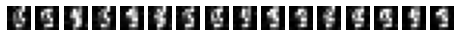

In [44]:
# Making inference with QGAN

#q_model = torch.load('torch_results/QGAN/QGAN_linear/20230110-161015/lin_q_gen_epoch_2')  # '0' features 6 layers
q_model = torch.load('torch_results/QGAN/QGAN_linear/20230111-151825/lin_q_gen_epoch_2')  # '1' features 6 layers 
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221228-173805/lin_q_gen_epoch_1400')  # '0' '1' features 6 layers new vqc
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221228-141802/lin_q_gen_epoch_510')  # '0' features 6 Random layers
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221219-093229/q_gen_epoch_1500')  # '0','1' features 6 layers
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221216-125209/q_gen_epoch_1000')  # '0','1' features 8 layers
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221216-150017/q_gen_epoch_2000')  # '0','1' features 10 layers
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221216-112234/q_gen_epoch_2000')  # '0','1','2' features
q_model.eval()

QGAN_imgs = []
for i in range(len(real_data)):      
    fixed_noise = torch.rand(1, 5)  
    q_image = q_model(fixed_noise).view(1,8,8).cpu().detach()
    QGAN_imgs.append(q_image)

show_images(QGAN_imgs, 16)

In [45]:
#q_synthetic = torch.load('torch_results/QGAN/QGAN_linear/20221228-173805/synthetic.pt')  
#generated_images(q_synthetic)
#show_images(q_synthetic[:20], 8), len(q_synthetic)

/tmp/ipykernel_1884/3369465933.py:14: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df1, df2, df3], 1)


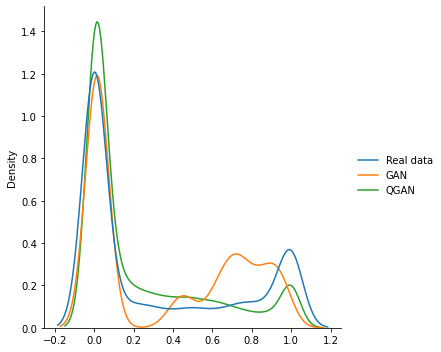

In [46]:
# Plotting histogram probability distributions 

linear_gan_synthetic = np.concatenate(GAN_imgs).reshape(len(GAN_imgs), 8, 8)
reshaped_linear_gan_synthetic = linear_gan_synthetic.reshape(len(GAN_imgs)*64)
linear_qgan_synthetic = np.concatenate(QGAN_imgs).reshape(len(QGAN_imgs), 8, 8)
reshaped_linear_qgan_synthetic = linear_qgan_synthetic.reshape(len(QGAN_imgs)*64)
real_data = np.concatenate(real_data).reshape(len(real_data), 8, 8)
reshaped_real_data = real_data.reshape(len(real_data)*64)

empty_dataframe = pd.DataFrame(columns=['Real data','GAN', 'QGAN'])
df1 = pd.DataFrame(reshaped_real_data)
df2 = pd.DataFrame(reshaped_linear_gan_synthetic)
df3 = pd.DataFrame(reshaped_linear_qgan_synthetic)
df = pd.concat([df1, df2, df3], 1)
df.columns = ['Real data','GAN', 'QGAN']

sns.displot(data = df, kind = 'kde')